In [1]:
## importing required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Data trained projects data set\DSData-master\loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Dataset shape
df.shape

(614, 13)

In [5]:
# Checking the value in the Married column 
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [6]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Checking the null values in the dataset
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Description of Dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Dropping the Unwanted columns
df = df.drop(columns = ['Gender'])

In [10]:
# using LabelEncoder to transform the string into numerical data
le = LabelEncoder()

In [11]:
# Transforming the string data
df1 = le.fit_transform(df['Loan_ID'])
pd.Series(df1)
df['Loan_ID'] = df1
df2 = le.fit_transform(df['Dependents'])
pd.Series(df2)
df['Dependents'] = df2
df3 = le.fit_transform(df['Education'])
pd.Series(df3)
df['Education'] = df3
df4 = le.fit_transform(df['Married'])
pd.Series(df4)
df['Married'] = df4
df5 = le.fit_transform(df['Self_Employed'])
pd.Series(df5)
df['Self_Employed'] = df5
df6 = le.fit_transform(df['Property_Area'])
pd.Series(df6)
df['Property_Area'] = df6
df7 = le.fit_transform(df['Loan_Status'])
pd.Series(df7)
df['Loan_Status'] = df7

In [12]:
#Checking the transforming dataset into numerical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [13]:
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
# Dataset contains null values need to fill with mean value of column using SimpleImputer
imp = SimpleImputer(strategy = 'mean')
impu =imp.fit_transform(df)
df_new = pd.DataFrame(impu,columns = df.columns)

In [15]:
df_new

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [16]:
#Assigning the columns to its original 
df = df_new

In [17]:
# checking the dataset dscription 
df.describe()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [18]:
#Checking the values in the married columns
df.Married.value_counts()

1.0    398
0.0    213
2.0      3
Name: Married, dtype: int64

In [19]:
# Checking the values in the Dependents column
df.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
4.0     15
Name: Dependents, dtype: int64

In [20]:
# Checking the values in the Education column
df.Education.value_counts()

0.0    480
1.0    134
Name: Education, dtype: int64

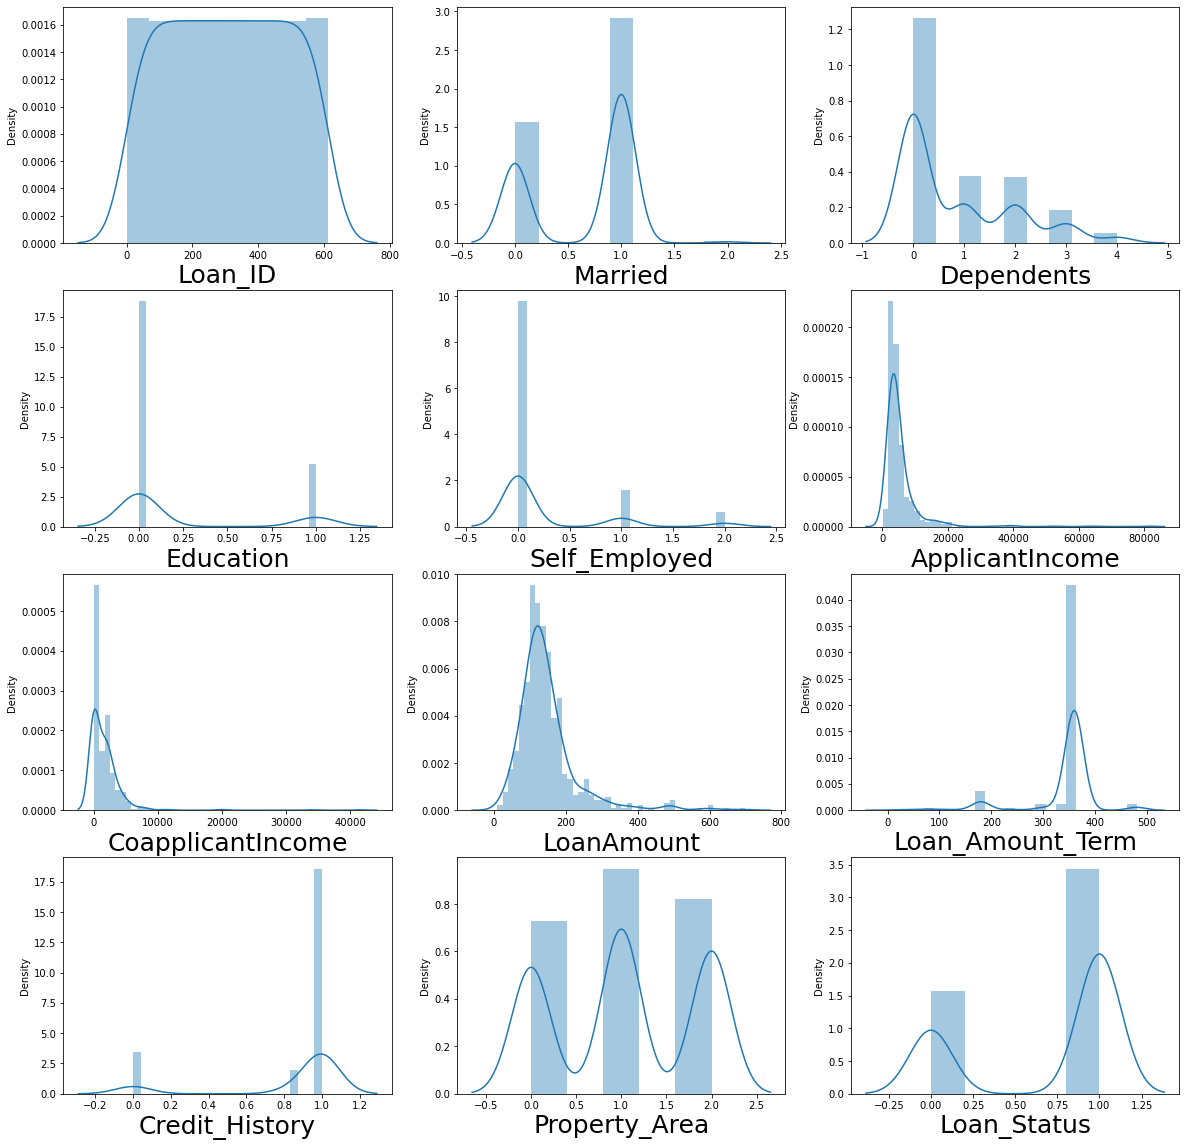

In [21]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

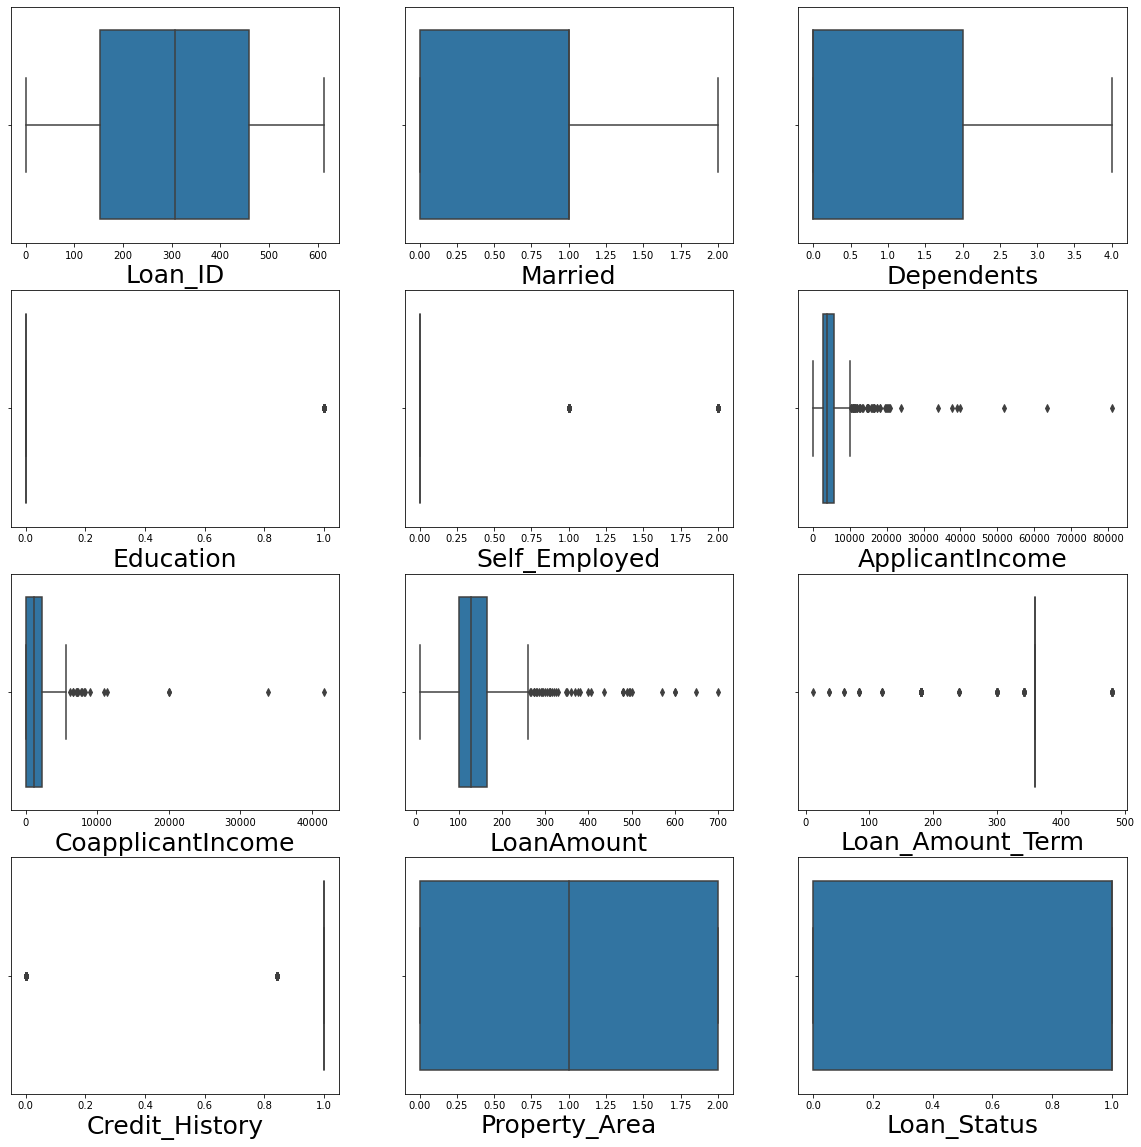

In [22]:
## plotting box for checking data skweness
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,3,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

In [23]:
# Checking the outliers and data skewness
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [24]:
iqr

Loan_ID               306.50
Married                 1.00
Dependents              2.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

In [25]:
# Removing outliers in the Education columns
edu = (q3.Education + (1.5 * iqr.Education))
edu

index = np.where(df['Education']>edu)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,2.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
4,5,5.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
476,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
477,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
478,612,612.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


In [26]:
# Removing outliers in the Self_Employed columns
se = (q3.Self_Employed + (1.5 * iqr.Self_Employed))
se

index = np.where(df['Self_Employed']>se)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
385,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
386,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
387,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [27]:
# Removing outliers in the ApplicantIncome columns
ai = (q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome))
ai

index = np.where(df['ApplicantIncome']>ai)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
352,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
353,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
354,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [28]:
# Removing outliers in the CoapplicantIncome columns
ci = (q3.CoapplicantIncome + (1.5 * iqr.CoapplicantIncome))
ci

index = np.where(df['CoapplicantIncome']>ci)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
341,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
342,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
343,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [29]:
# Removing outliers in the LoanAmount columns
la = (q3.LoanAmount + (1.5 * iqr.LoanAmount))
la

index = np.where(df['LoanAmount']>la)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
331,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
332,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
333,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [30]:
# Removing outliers in the Lower Loan_Amount_Term columns
lat = (q1.Loan_Amount_Term - (1.5 * iqr.Loan_Amount_Term))
lat

index = np.where(df['Loan_Amount_Term']>lat)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
321,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
322,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
323,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [31]:
# Removing outliers in the  higher Loan_Amount_Term columns
lat = (q3.Loan_Amount_Term + (1.5 * iqr.Loan_Amount_Term))
lat

index = np.where(df['Loan_Amount_Term']>lat)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
321,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
322,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
323,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


In [32]:
# Removing outliers in the Credit_History columns
ch = (q3.Credit_History + (1.5 * iqr.Credit_History))
ch

index = np.where(df['Credit_History']>ch)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
3,7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0,0.0
4,8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0,1.0
321,609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
322,610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
323,611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0


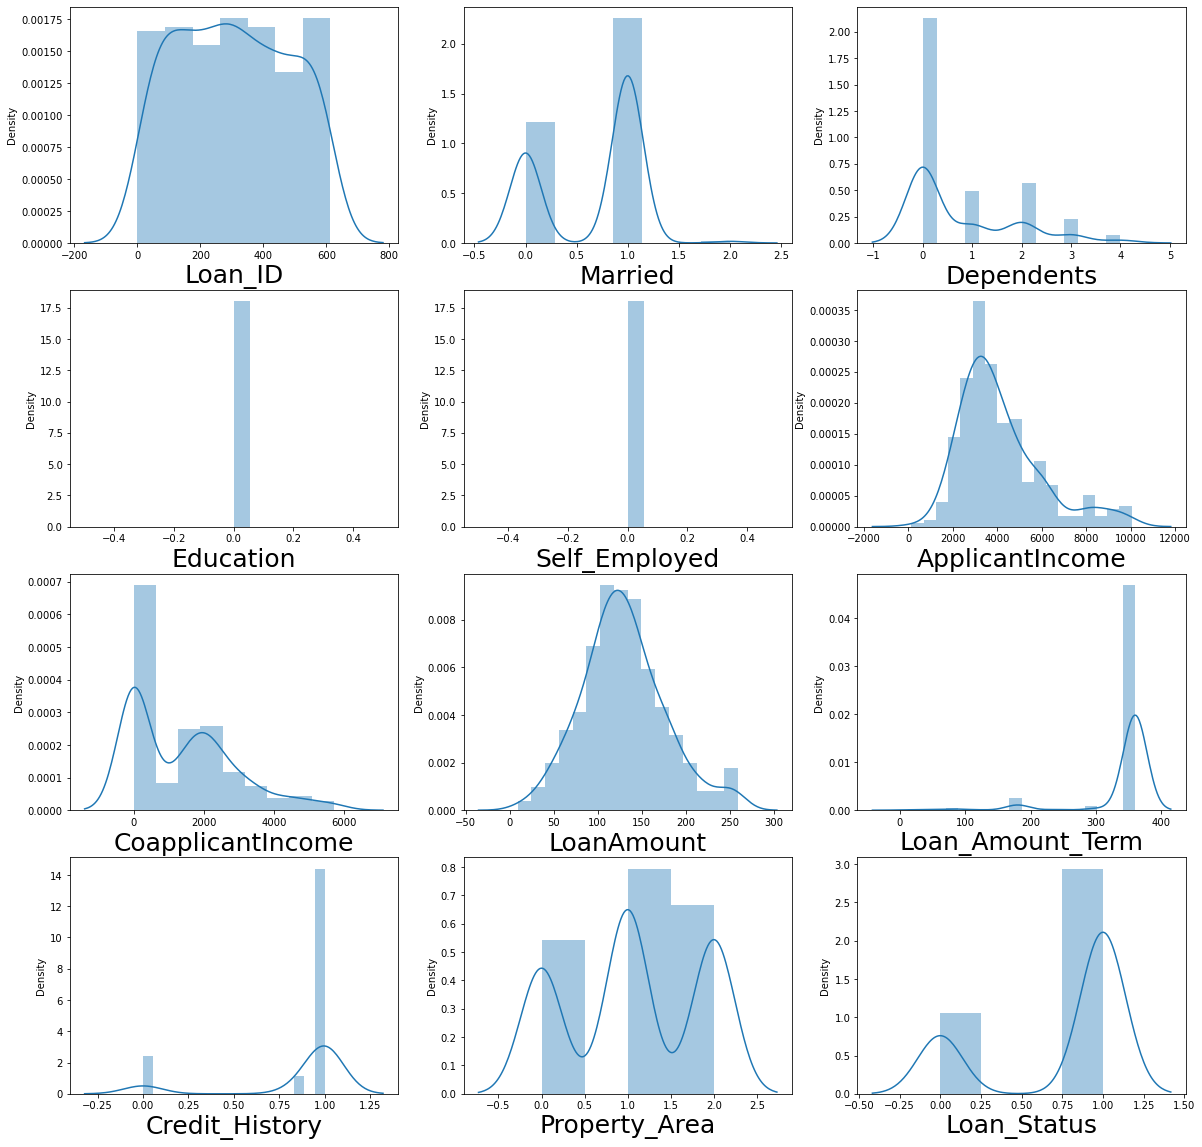

In [33]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=12:
        sx = plt.subplot(4,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

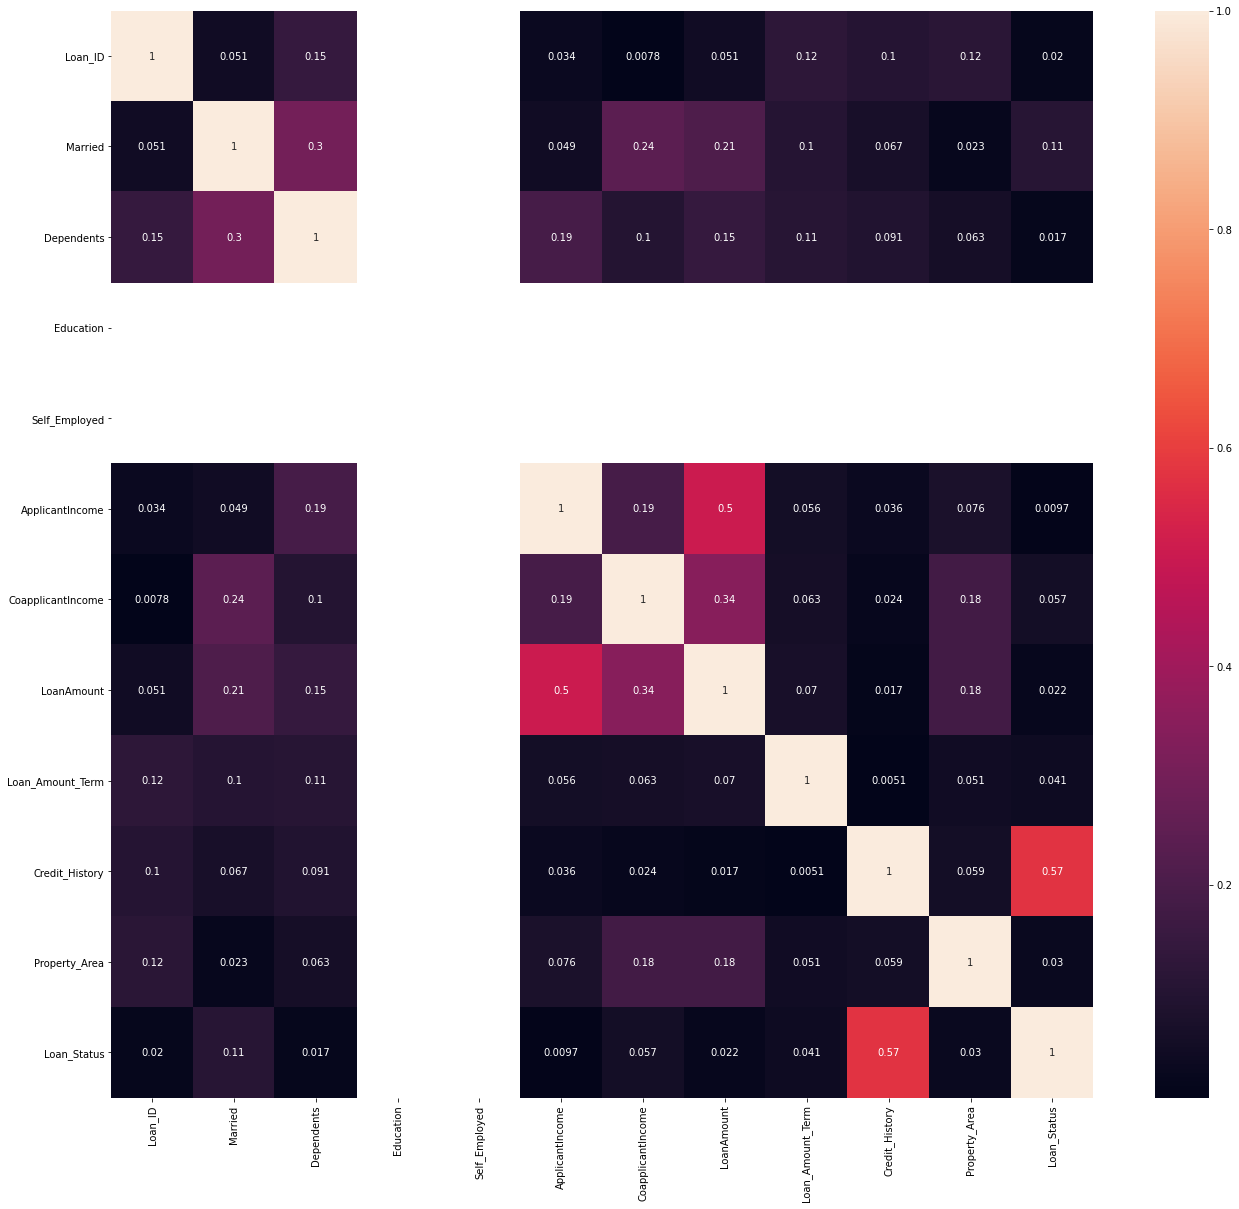

In [34]:
#finding the Co-relation between the columns using heatmap
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

In [35]:
# Splitting the dataset into Labels and Features
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [36]:
x

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0
7,7.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.000000,360.0,0.0,1.0
8,8.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
608,608.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.000000,360.0,1.0,0.0
609,609.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0
610,610.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0
611,611.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0


In [37]:
y

0      1.0
1      0.0
4      1.0
7      0.0
8      1.0
      ... 
608    1.0
609    1.0
610    1.0
611    1.0
612    1.0
Name: Loan_Status, Length: 325, dtype: float64

In [38]:
# Transforming the dataset into Standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [39]:
#Splitting the training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [40]:
#using KNeighbors classifier algorithm for this prolem statement for  classification problem
knn = KNeighborsClassifier()

In [41]:
#Applying the KNeighbors Classifier
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
#Predicting the values using KNeighborsClasssifier
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 6, 14],
       [ 3, 59]], dtype=int64)

In [44]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.30      0.41        20
         1.0       0.81      0.95      0.87        62

    accuracy                           0.79        82
   macro avg       0.74      0.63      0.64        82
weighted avg       0.77      0.79      0.76        82



In [45]:
#Cross validation score 
cross_val_score(knn,x_sc,y,cv = 5)

array([0.86153846, 0.78461538, 0.8       , 0.87692308, 0.84615385])

In [46]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.8338461538461539

In [47]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [5,7,9,11,13,15,19],'n_neighbors' : [3,5,7,9,11,15,17]}

In [48]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 11}

In [49]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 5 , n_neighbors = 11)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, n_neighbors=11)

In [51]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[ 5, 15],
       [ 2, 60]], dtype=int64)

In [53]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.25      0.37        20
         1.0       0.80      0.97      0.88        62

    accuracy                           0.79        82
   macro avg       0.76      0.61      0.62        82
weighted avg       0.78      0.79      0.75        82



In [54]:
# LogisticRegression 
lr = LogisticRegression()

In [55]:
#Applying the LogisticRegression Algorithm
lr.fit(x_train,y_train)

LogisticRegression()

In [56]:
#Predicting the value using LogisticRegression
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 5, 15],
       [ 2, 60]], dtype=int64)

In [58]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.25      0.37        20
         1.0       0.80      0.97      0.88        62

    accuracy                           0.79        82
   macro avg       0.76      0.61      0.62        82
weighted avg       0.78      0.79      0.75        82



In [59]:
#Using DecisionTree Classifier 
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
#DecisionTree score for trainig data
dt.score(x_train,y_train)

1.0

In [61]:
#Predicting the value wih x_test data
y_pred = dt.predict(x_test)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [62]:
#Accuracy model score
acc = accuracy_score(y_test,y_pred)
acc

0.6951219512195121

In [63]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 8, 12],
       [13, 49]], dtype=int64)

In [64]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.38      0.40      0.39        20
         1.0       0.80      0.79      0.80        62

    accuracy                           0.70        82
   macro avg       0.59      0.60      0.59        82
weighted avg       0.70      0.70      0.70        82



In [65]:
#Cross validation score 
cross_val_score(dt,x_sc,y,cv = 5)

array([0.4       , 0.72307692, 0.81538462, 0.76923077, 0.24615385])

In [66]:
cross_val_score(DecisionTreeClassifier(),x_sc,y,cv =5).mean()

0.5938461538461539

In [67]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [68]:
grid_search = GridSearchCV(estimator = dt,param_grid = grid_param,cv = 5)

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [70]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [71]:
#Applying the best parameters into DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 2,min_samples_leaf = 4,min_samples_split = 2)

In [72]:
#Applying the best parameters into training data
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

In [73]:
#predicting the values with new Parameters
y_pred = dt.predict(x_test)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
#Accuracy score with best_feature using GridSearchCV
accuracy_score(y_test,y_pred)

0.8170731707317073

In [75]:
## problem statement to predict the Loan status of a person
## Classification problem

## Used three Algorithm 
 #1) KNeighborsClassifier got 79% Accracy
 #2) DecisionTreeClassifier got 81% Accuracy
 #3) LogisticRegression got 79% Accuracy 
    
    # The best model fit for this problem statement to predict Loan status is DecisonTreeClassifier